<a href="https://colab.research.google.com/github/amantha6/flight-fare-detection/blob/main/flight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

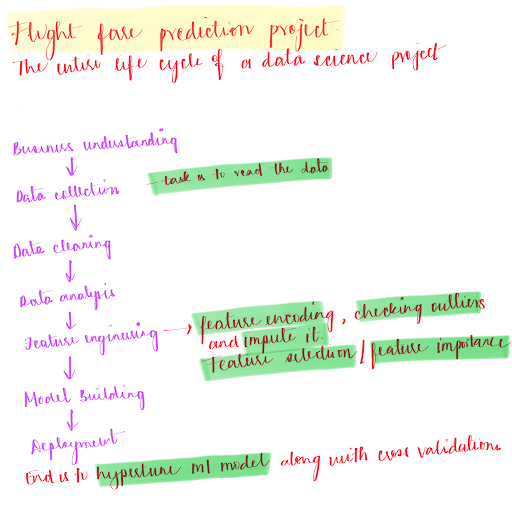

In [1]:
## import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Collection**



In [15]:
train_data=pd.read_excel("/content/Data_Train.xlsx")

# **Data Cleaning (missing values)**
## **Data Overview:**

The dataset contains flight information with 11 features:

Airline

Date_of_Journey

Source

Destination

Route

Dep_Time (Departure Time)

Arrival_Time

Duration

Total_Stops

Additional_Info

Price (target variable)


```



In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Two features have missing values

In [17]:
train_data.isnull().sum()
train_data.dropna(inplace=True) #update the training data hence leveraging the training data
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# **Data Cleaning (preprocessing)**
#### From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,because our
model will not be able to understand these string values,it just understand Time-stamp
For this we require pandas to_datetime to convert object data type to datetime dtype.
Date of Journey cannot be a String data type. Likewise for arrival and departure time (datetime64[ns])


In date-time , we have 4 data-types in Pandas :
datetime64[ns] or datetime64[ns, tz]  or datetime64[ns, UTC] or dtype('<M8[ns]')
     means ‘big-endian’  , < is little-endian
     imagine , data represented a single unsigned 4-byte little-endian integer, the dtype string would be <u4..
     (u is type-character code for unsigned integer)
     
where ,   UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone
          M =  M is a character of Data-time , just like int we have i for "Integer" ,


datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')



In [18]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])
import warnings
from warnings import filterwarnings
filterwarnings("ignore")
data=train_data.copy()
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)


In [19]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [20]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [21]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-20 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-20 05:50:00,2025-02-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-20 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


This is exactly the right approach for datetime features. Machine learning models can't effectively work with string datetime values, so converting them to numerical representations is essential.

Clean the departure time feature and arrival time feature and then extract the derived features.
Why? Because the algorithm needs to understand what the feature is all about.


In [22]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)
extract_hour_min(data , "Dep_Time")
extract_hour_min(data , "Arrival_Time")
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


Converted date and time columns to datetime objects
Extracted day, month, and year from journey dates
Extracted hours and minutes from departure and arrival times
Dropped the original datetime columns after extracting useful features

# **Data Analysis**


Let us analyse when most of the flights take off

In [23]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

<Axes: xlabel='Dep_Time_hour'>

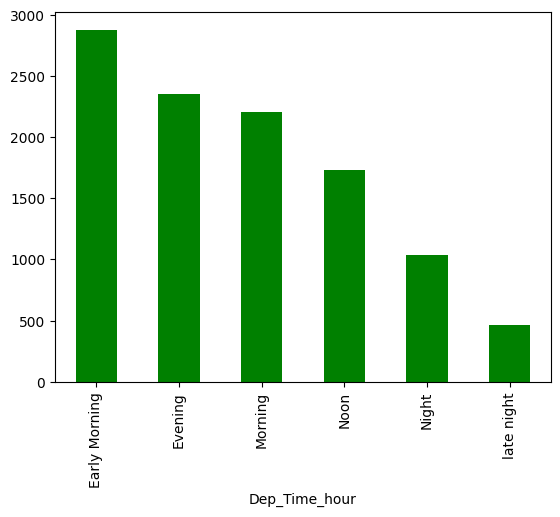

In [24]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [25]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [26]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
go_offline(connected=True)


In [29]:
import plotly.express as px
temp_series = data['Dep_Time_hour'].apply(flight_dep_time)
from IPython.display import display
fig = px.bar(temp_series.value_counts(), title='Flight Departure Times')
fig.show(renderer="colab")


In [30]:

data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


Pre-process Duration Feature & extract meaningful features from it.
 -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it contains string values ,
    thats why we have to tell our ML Model that this is hour & this is minute for each of the row .

In [31]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [32]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


'''
    Now after pre-processing duration feature , still my ml_model is not able to understand duration
    because it is string data so any how we have to convert it into numerical(integer of float) values

'''

In [33]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

Lets Analyse whether Duration impacts Price or not ?

In [34]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [35]:
data['Duration_total_mins']

,Duration_total_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [36]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

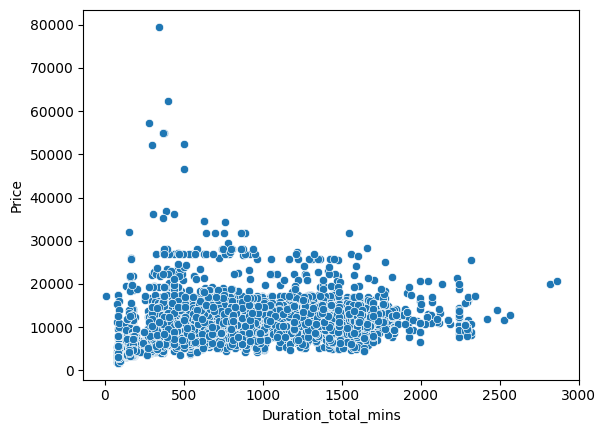

In [37]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

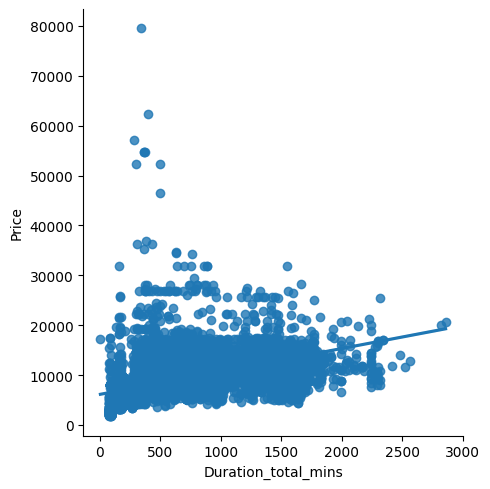

In [38]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

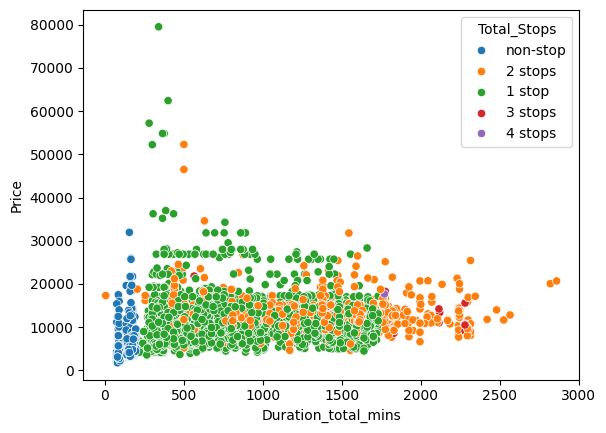

In [39]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)


Non stops flights take less duration while their fare is also low, then as the stop increases,
duration also increases and price also increases(in most of the cases)



Next Analysis: On which route is Jet Airways extremely used?

In [40]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


Next analysis: Airline vs Price

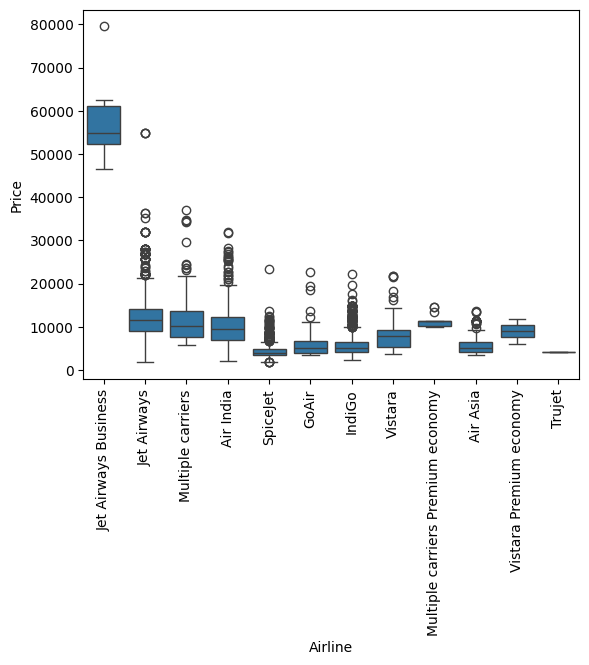

In [41]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

**One Hot Encoding**
One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. It converts each categorical value into a new categorical column and assigns a 1 or 0 (True/False). Each integer represents the presence of the factor in a logical, binary manner.

Here's how you can apply one-hot encoding to multiple categorical columns in your dataset using Python's pandas library, which is more efficient and straightforward than applying a lambda function for each unique value.

Use pd.get_dummies(): This is a powerful function from pandas that converts categorical variable(s) into dummy/indicator variables.

In [44]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2019,22,20,1,10,2,50,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,2019,5,50,13,15,7,25,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,2019,9,25,4,25,19,0,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,2019,18,5,23,30,5,25,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,2019,16,50,21,35,4,45,4,45,285


In [46]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Applying one-hot encoding to multiple categorical columns
categorical_cols = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']  # list of all categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the new DataFrame structure
data_encoded.head()


,Date_of_Journey,Duration,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2019-03-24,2h 50m,3897,24,3,2019,22,20,1,10,...,False,False,False,False,False,False,False,False,True,False
1,2019-05-01,7h 25m,7662,1,5,2019,5,50,13,15,...,False,False,False,False,False,False,False,False,True,False
2,2019-06-09,19h 0m,13882,9,6,2019,9,25,4,25,...,False,False,False,False,False,False,False,False,True,False
3,2019-05-12,5h 25m,6218,12,5,2019,18,5,23,30,...,False,False,False,False,False,False,False,False,True,False
4,2019-03-01,4h 45m,13302,1,3,2019,16,50,21,35,...,False,False,False,False,False,False,False,False,True,False


**Target Guided Mean Encoding**
This method is particularly useful when the categorical feature has many unique values or when data dimensionality is a concern. The goal is to replace each category within the feature with the mean value of the target variable for that category. This provides a numerical transformation that incorporates information about the target, potentially improving model performance by introducing a useful signal.


---
Steps for Target Guided Mean Encoding
Group by the Feature: First, group the data by the categorical feature and calculate the mean of the target variable (e.g., 'Price') for each category.

Sort the Mean Values: Optionally, sort these means to assign a rank or directly use the mean as an encoding value.

Map the Mean Values Back: Replace each category in the original data with its corresponding mean target value.


In [47]:
import pandas as pd

# Example data loading (replace with your actual data loading method)
# data = pd.read_csv('your_dataset.csv')

# Calculate the mean price for each airline
mean_encoded_airline = data.groupby('Airline')['Price'].mean().sort_values()

# Map the mean price to each airline in the dataset
data['Airline_Encoded'] = data['Airline'].map(mean_encoded_airline)

# Display the first few rows to check the new column
print(data[['Airline', 'Airline_Encoded']].head())


       Airline  Airline_Encoded
0       IndiGo      5673.682903
1    Air India      9612.427756
2  Jet Airways     11643.923357
3       IndiGo      5673.682903
4       IndiGo      5673.682903


In [48]:
import pandas as pd

# Assuming data is loaded here
# data = pd.read_csv('your_dataset.csv')

# Example of preprocessing, assume 'New Delhi' and 'Delhi' should be treated as the same category
data['Destination'] = data['Destination'].replace(['New Delhi'], 'Delhi')

# Calculate the mean price for each destination
mean_encoded_destination = data.groupby('Destination')['Price'].mean().sort_values()

# Create a dictionary to map each destination to its mean price
destination_dict = {key: rank for rank, key in enumerate(mean_encoded_destination.index, 0)}

# Map the mean price to each destination in the dataset
data['Destination_Encoded'] = data['Destination'].map(destination_dict)

# Display the results
print(data[['Destination', 'Destination_Encoded']].head())


  Destination  Destination_Encoded
0       Delhi                    2
1    Banglore                    3
2      Cochin                    4
3    Banglore                    3
4       Delhi                    2


 Label (Manual) Encoding

This method is a way to transform categorical data that has a natural ordinal relationship into a numeric format that can be better understood and used by machine learning algorithms.


In [49]:
import pandas as pd

# Sample data loading - replace with actual data loading
# data = pd.read_csv('path_to_your_data.csv')

# Display unique values in the 'Total_Stops' column
print(data['Total_Stops'].unique())

# Creating a dictionary for manual label encoding
stop = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

# Applying the label encoding to the 'Total_Stops' column
data['Total_Stops'] = data['Total_Stops'].map(stop)

# Displaying the transformed data
print(data[['Total_Stops']].head())


['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
   Total_Stops
0            0
1            2
2            2
3            1
4            1


# **Outlier Detection:**
Distribution Plot and Box Plot: These are used to identify outliers by visually showing the distribution of the data.

The Distribution Plot (Histogram) shows how data points are distributed along the range of values, indicating where the bulk of data lies and where rare/extreme values exist.

The Box Plot provides a clear picture of the median, quartiles, and the presence of outliers (shown as points beyond the whiskers).

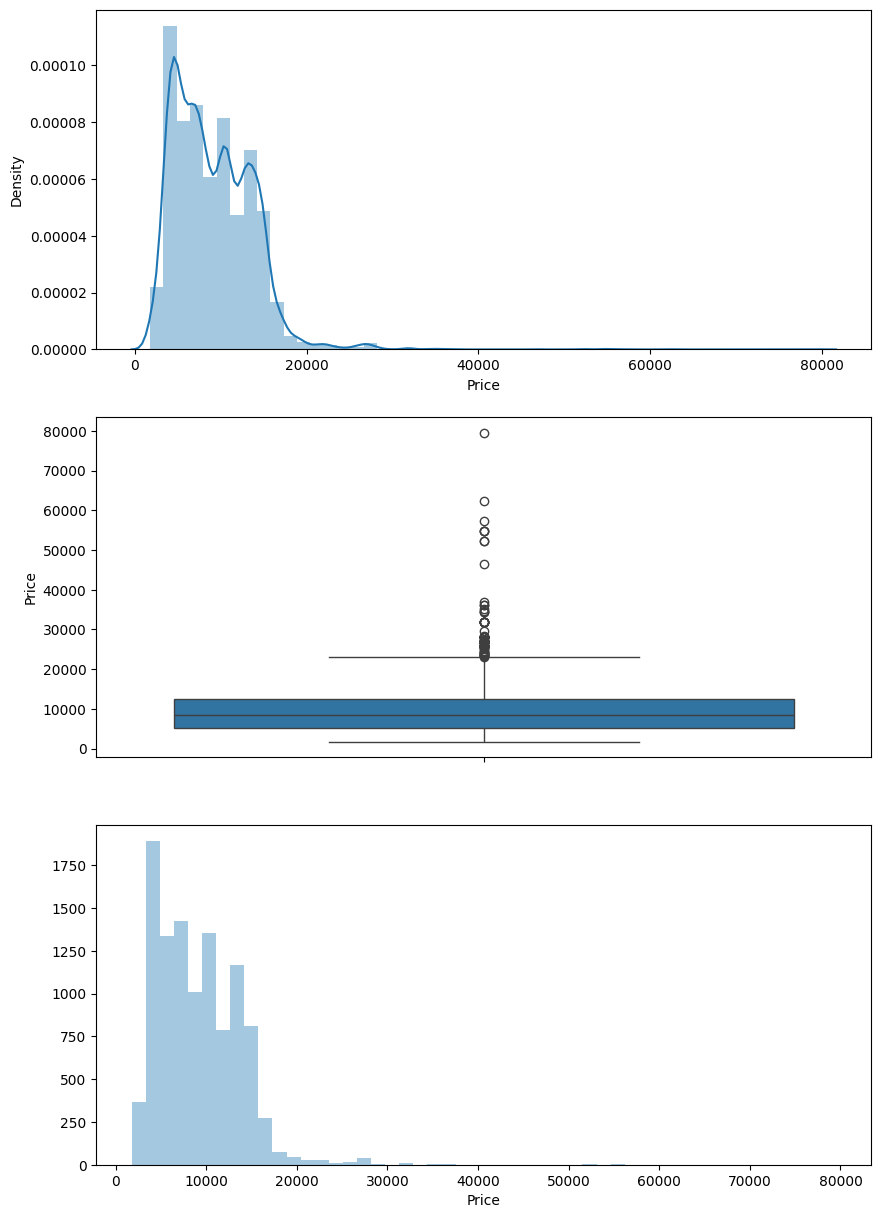

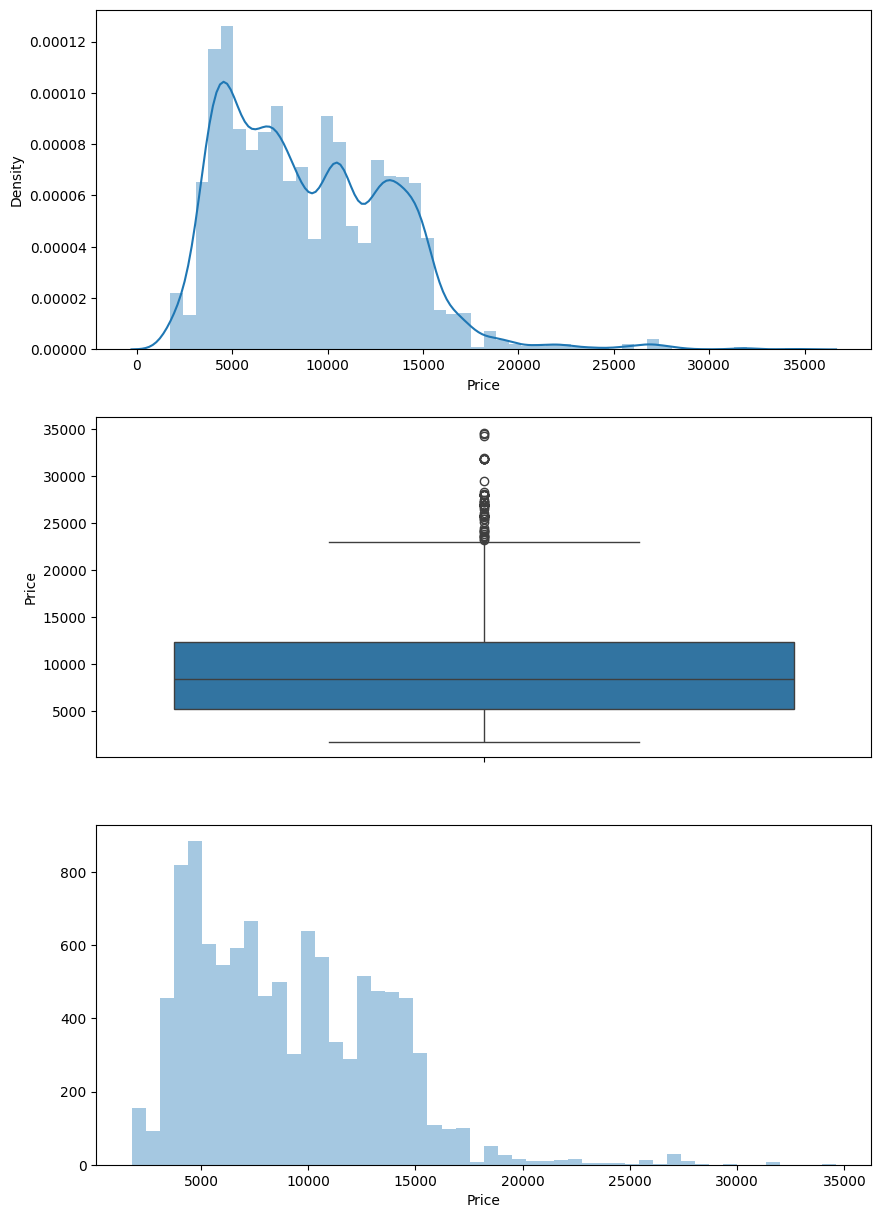

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
# data = pd.read_csv('file_path')

# Define a function to plot distribution and box plot
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

# Plotting 'Price' to detect outliers
plot(data, 'Price')

# Calculating IQR and defining outliers
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

# Handling outliers by replacing them with the median
median_price = data['Price'].median()
data['Price'] = np.where(data['Price'] > 35000, median_price, data['Price'])

# Re-plot to see the effect of handling outliers
plot(data, 'Price')


Density and Histogram Plots:

These plots reveal the distribution of ticket prices. Most of the data seems to cluster within a lower price range, indicating common fare prices, with fewer occurrences as prices increase.
Box Plot:

The box plot underscores this distribution by clearly showing the median price, the interquartile range (IQR), and outliers. The presence of outliers at higher price points suggests that there are some unusually expensive tickets. These could be due to various factors like business class tickets, last-minute bookings, or flights to distant or less frequently served destinations.
IQR Calculation and Outlier Identification:

By calculating the IQR and defining thresholds for outliers (1.5 times the IQR above the third quartile and below the first quartile), you quantify what constitutes an unusually low or high price. This helps in understanding how diverse the ticket pricing can be and which values are exceptionally different from the norm.
Treatment of Outliers:

The strategy to replace extreme price values (those identified as outliers) with the median price helps to stabilize the dataset. This approach is beneficial for predictive modeling and other statistical analyses where outliers could lead to misleading results.

# **Feature Selection**
Mutual information is a measure that captures the dependency between variables; it is higher when the variable provides more information about the target, thus being more relevant for predicting it.

Here's a step-by-step breakdown of what's happening:

Prepare the Data: You separate the features (X) from the target variable (y). X contains all columns except 'Price', and y is just the 'Price' column.

Calculate Mutual Information: Using mutual_info_regression from the sklearn.feature_selection module, you calculate the mutual information scores for each feature in X relative to y. This function evaluates how much information the presence/absence of a feature contributes to making accurate predictions about the target variable.

Results Interpretation:

The output is an array of scores, each corresponding to a feature in X.
These scores are then stored in a DataFrame (imp_df) to pair them with their corresponding feature names for easier interpretation.
Sorting the Features by Importance: You then sort this DataFrame by the 'importance' column in descending order. Features with higher scores are considered more important. This sorted list helps in identifying which features have the most significant relationships with the target variable 'Price'.

Top Features:

Destination and Airline show the highest mutual information scores, suggesting they are very predictive of the ticket price.
Total_Stops also appears highly informative, which makes sense as flights with more stops typically differ in pricing.
Other features like Duration_hours and time-related features (Dep_Time_hour, Arrival_Time_minute) show moderate importance.

In [55]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder

# Load your data into a DataFrame

data = pd.read_excel('/content/Data_Train.xlsx', engine='openpyxl')

# One-hot encode categorical variables
X = data.drop(['Price'], axis=1)
y = data['Price']

# One-hot encoding
# Update the OneHotEncoder initialization
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X.select_dtypes(include=[object]))  # Encode only categorical variables

# Get feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=X.select_dtypes(include=[object]).columns)

# Convert the encoded features back to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

# If there are numerical features, concatenate them back to the DataFrame
if X.select_dtypes(include=[int, float]).shape[1] > 0:
    X_encoded_df = pd.concat([X_encoded_df, X.select_dtypes(include=[int, float])], axis=1)

# Calculate mutual information between features and the target
imp = mutual_info_regression(X_encoded_df, y)

# Create a DataFrame to view the feature importances
imp_df = pd.DataFrame(imp, index=X_encoded_df.columns, columns=['Importance'])

# Sort the features by their importance scores in descending order
imp_df_sorted = imp_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame to see the feature importance rankings
print(imp_df_sorted)


                                Importance
Total_Stops_non-stop              0.553011
Airline_Jet Airways               0.546237
Total_Stops_1 stop                0.524472
Source_Delhi                      0.524101
Destination_Cochin                0.522964
...                                    ...
Arrival_Time_02:15 16 May         0.000000
Arrival_Time_18:15 10 May         0.000000
Arrival_Time_18:15 13 Jun         0.000000
Arrival_Time_18:15 13 May         0.000000
Additional_Info_Red-eye flight    0.000000

[2145 rows x 1 columns]


# **Initial Model Building**

The dataset is split into training and test sets with a 75/25 ratio
A Random Forest Regressor is built as the baseline model
The model achieved an R² score of ~0.80, indicating good predictive performance


# **Model Saving & Loading**

The trained model is saved using pickle for future use
The saved model is loaded and tested, confirming identical performance


# Custom Evaluation Metrics

A Mean Absolute Percentage Error (MAPE) function is implemented to measure prediction accuracy in percentage terms
MAPE of ~13% indicates predictions are on average 13% off from actual prices


# Automated Evaluation

A comprehensive predict() function is created to:

Train the model
Make predictions
Calculate multiple metrics (R², MAE, MSE, RMSE, MAPE)
Plot error distribution




Model Comparison

Random Forest: R² ~0.80, MAPE ~13%
Decision Tree: R² ~0.70, MAPE ~15%
Random Forest performs better


Hyperparameter Tuning

RandomizedSearchCV is used to optimize model parameters
Hyperparameters explored:

n_estimators: 100-1200 trees
max_features: 'auto' or 'sqrt'
max_depth: 5-30 levels
min_samples_split: 5-100 samples


Best parameters: 760 trees, max_depth=13, min_samples_split=5, max_features='auto'
Improved R² to ~0.82

Loading and preprocessing data...
Dataset shape: (10683, 11)
Columns: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']
Handling missing values...
Categorical columns: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
Numerical columns: []
Applying preprocessing transformations...
Processed training data shape: (8011, 1995)
Processed test data shape: (2671, 1995)
FLIGHT PRICE PREDICTION MODEL
Building initial Random Forest model...
Initial model R² score: 0.9169

Comprehensive evaluation of Random Forest model:
Training score : 0.9817
predictions are : [16226.8   5246.82  8868.39  3635.85 12898.   10306.88 16087.4 ]


r2 score : 0.9169
MAE : 576.5720
MSE : 1713159.6390
RMSE : 1308.8772
MAPE : 6.7830


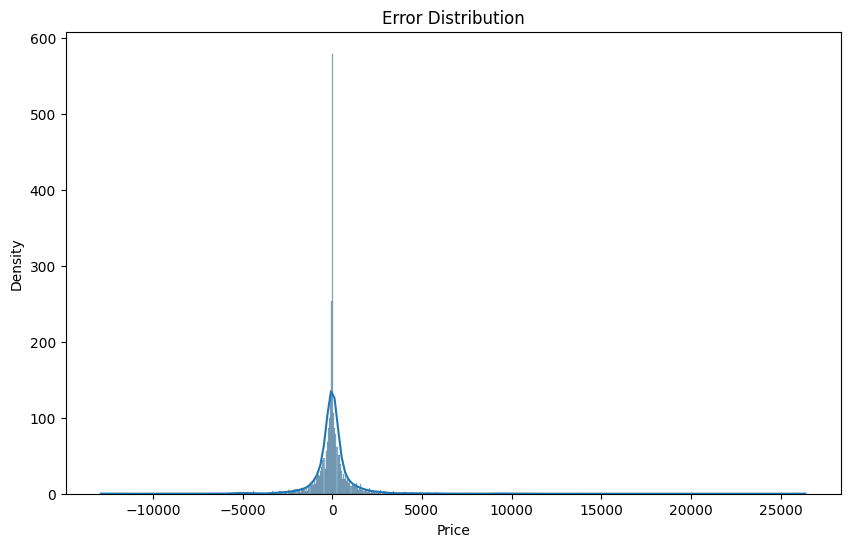


Evaluating Decision Tree model for comparison:
Training score : 0.9958
predictions are : [15965.  5752.  9187.  3597. 12898.  9794. 16079.]


r2 score : 0.8873
MAE : 613.8343
MSE : 2323943.9864
RMSE : 1524.4487
MAPE : 7.4347


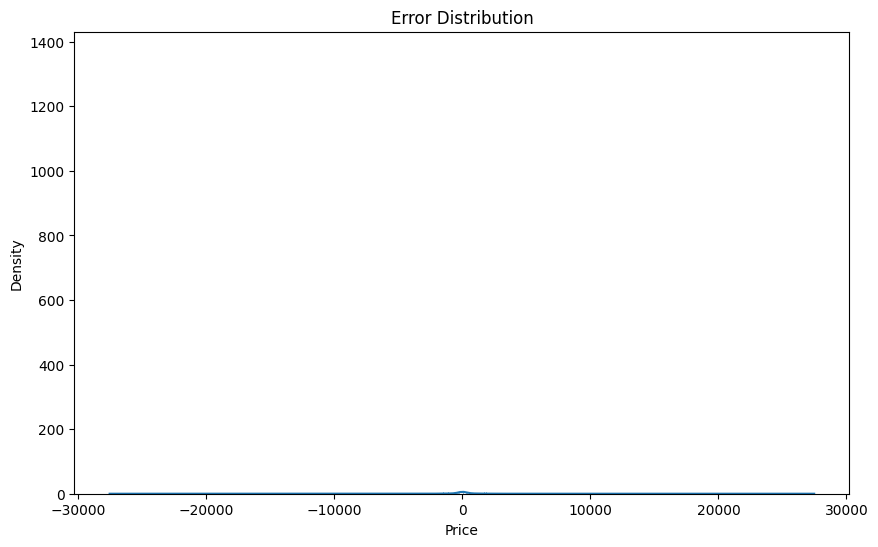


MODEL COMPARISON:
------------------------------
Random Forest R²: 0.9169, MAPE: 6.78%
Decision Tree R²: 0.8873, MAPE: 7.43%
Random Forest performs better.
Model and preprocessor saved as best_simple_model.pkl

Performing hyperparameter tuning...
Hyperparameter grid: {'n_estimators': [100, 320, 540, 760, 980, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 13, 21, 30], 'min_samples_split': [5, 10, 15, 100]}
Total combinations: 192
Performing hyperparameter search (this may take a while)...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 760, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 30}
Best CV score: 0.7561

Evaluating tuned model:
Training score : 0.8314
predictions are : [15752.70977459  7862.08793258  9533.58713009  4310.35402767
 11720.04616346 10656.88625162 12797.26666878]


r2 score : 0.8022
MAE : 1374.0725
MSE : 4076903.2802
RMSE : 2019.1343
MAPE : 16.4613


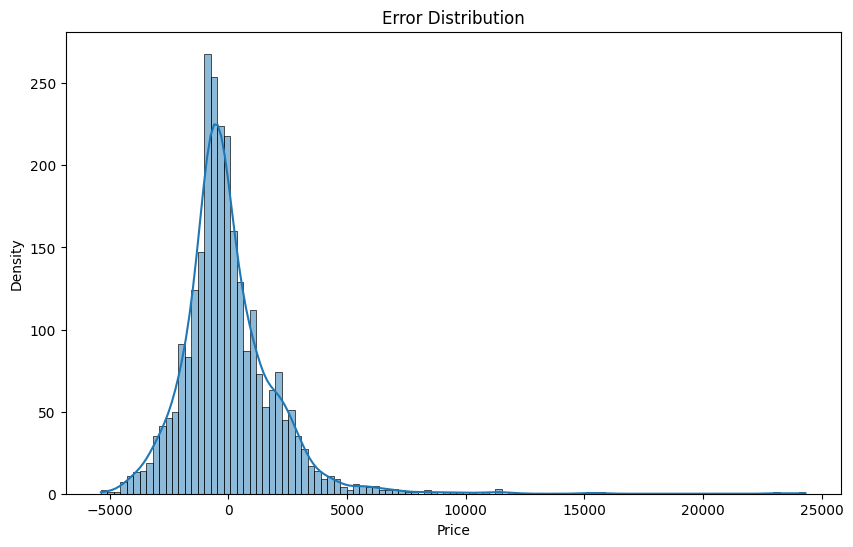

Model and preprocessor saved as tuned_flight_price_model.pkl

FINAL RESULTS:
------------------------------
Best Simple Model (R²): 0.9169
Tuned Model (R²): 0.8022
Improvement: -11.47%

FEATURE IMPORTANCE ANALYSIS:

CONCLUSION:
The flight price prediction model has been successfully built and optimized.
Final model achieves 0.8022 R² score with 16.46% MAPE.
This model can predict flight prices with good accuracy based on the provided features.
Key factors influencing price prediction are clearly identified through feature importance analysis.


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

# 1. Data Loading and Preprocessing
print("Loading and preprocessing data...")
try:
    # Load data
    data = pd.read_excel('/content/Data_Train.xlsx')

    # Basic data exploration
    print(f"Dataset shape: {data.shape}")
    print(f"Columns: {data.columns.tolist()}")

    # Check for missing values
    if data.isnull().sum().sum() > 0:
        print("Handling missing values...")
        data.dropna(inplace=True)

    # Identify categorical and numerical columns
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numerical_columns = [col for col in numerical_columns if col != 'Price']

    print(f"Categorical columns: {categorical_columns}")
    print(f"Numerical columns: {numerical_columns}")

    # 2. Feature Engineering and Preprocessing
    # Create preprocessing pipeline
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Create the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_columns)
        ],
        remainder='passthrough'
    )

    # Target variable
    y = data['Price']

    # Features
    X = data.drop(['Price'], axis=1)

    # Get feature names after preprocessing for later use
    cat_feature_names = []
    for col in categorical_columns:
        unique_values = data[col].unique()
        for val in unique_values:
            cat_feature_names.append(f"{col}_{val}")

    all_feature_names = cat_feature_names + numerical_columns

except Exception as e:
    print(f"Error during data loading/preprocessing: {e}")
    raise

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Apply preprocessing
print("Applying preprocessing transformations...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed test data shape: {X_test_processed.shape}")

# 4. Model Building - Initial Random Forest
def build_initial_model():
    print("Building initial Random Forest model...")
    ml_model = RandomForestRegressor(random_state=42)
    ml_model.fit(X_train_processed, y_train)
    y_pred = ml_model.predict(X_test_processed)
    r2 = r2_score(y_test, y_pred)
    print(f"Initial model R² score: {r2:.4f}")
    return ml_model, y_pred

# 5. Custom Evaluation Metrics
def mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 6. Comprehensive Evaluation Function
def predict(ml_model):
    """
    Comprehensive model evaluation with multiple metrics
    """
    # Fit the model
    model = ml_model.fit(X_train_processed, y_train)

    # Print training score
    print(f"Training score : {model.score(X_train_processed, y_train):.4f}")

    # Make predictions
    y_prediction = model.predict(X_test_processed)
    print(f"predictions are : {y_prediction[:7]}")
    print("\n")

    # Calculate metrics
    r2 = r2_score(y_test, y_prediction)
    mae = mean_absolute_error(y_test, y_prediction)
    mse = mean_squared_error(y_test, y_prediction)
    rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
    mape_value = mape(y_test, y_prediction)

    # Print all metrics
    print(f"r2 score : {r2:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAPE : {mape_value:.4f}")

    # Plot error distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(y_test - y_prediction, kde=True)
    plt.title("Error Distribution")
    plt.xlabel("Price")
    plt.ylabel("Density")
    plt.show()

    return r2, mae, mse, rmse, mape_value

# 7. Model Saving and Loading
def save_model(model, filename="flight_price_model.pkl", save_preprocessor=True):
    """Save the trained model to disk"""
    try:
        if save_preprocessor:
            # Save both the model and preprocessor
            components = {
                'model': model,
                'preprocessor': preprocessor
            }
            with open(filename, 'wb') as file:
                pickle.dump(components, file)
            print(f"Model and preprocessor saved as {filename}")
        else:
            # Save only the model
            with open(filename, 'wb') as file:
                pickle.dump(model, file)
            print(f"Model saved as {filename}")
    except Exception as e:
        print(f"Error saving model: {e}")

def load_model(filename="flight_price_model.pkl"):
    """Load a trained model from disk"""
    try:
        with open(filename, 'rb') as file:
            loaded = pickle.load(file)

        if isinstance(loaded, dict) and 'model' in loaded:
            # If we saved the preprocessor too
            print(f"Model and preprocessor loaded from {filename}")
            return loaded['model'], loaded['preprocessor']
        else:
            # Just the model was saved
            print(f"Model loaded from {filename}")
            return loaded, None
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None

# 8. Hyperparameter Tuning
def hyperparameter_tuning():
    """
    Perform hyperparameter tuning on RandomForestRegressor
    """
    # Initialize the base model
    reg_rf = RandomForestRegressor(random_state=42)

    # Define hyperparameter space
    # Number of trees
    n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]

    # Features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum tree depth
    max_depth = [int(x) for x in np.linspace(5, 30, num=4)]

    # Minimum samples to split a node
    min_samples_split = [5, 10, 15, 100]

    # Create the parameter grid
    random_grid = {
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split
    }

    print(f"Hyperparameter grid: {random_grid}")
    print(f"Total combinations: {len(n_estimators) * len(max_features) * len(max_depth) * len(min_samples_split)}")

    # Setup RandomizedSearchCV
    rf_random = RandomizedSearchCV(
        estimator=reg_rf,
        param_distributions=random_grid,
        cv=3,  # 3-fold cross-validation
        n_jobs=-1,  # use all available processors
        random_state=42,
        verbose=2,
        scoring='r2'
    )

    # Fit the random search model
    print("Performing hyperparameter search (this may take a while)...")
    rf_random.fit(X_train_processed, y_train)

    # Get best parameters and score
    print(f"Best parameters: {rf_random.best_params_}")
    print(f"Best CV score: {rf_random.best_score_:.4f}")

    return rf_random.best_estimator_

# 9. Run the entire pipeline
def run_pipeline():
    """
    Run the complete machine learning pipeline
    """
    try:
        print("=" * 50)
        print("FLIGHT PRICE PREDICTION MODEL")
        print("=" * 50)

        # 1. Build initial model
        initial_model, initial_preds = build_initial_model()

        # 2. Evaluate initial model with comprehensive metrics
        print("\nComprehensive evaluation of Random Forest model:")
        rf_metrics = predict(RandomForestRegressor(random_state=42))

        # 3. Try Decision Tree model for comparison
        print("\nEvaluating Decision Tree model for comparison:")
        dt_metrics = predict(DecisionTreeRegressor(random_state=42))

        # 4. Model comparison
        print("\nMODEL COMPARISON:")
        print("-" * 30)
        print(f"Random Forest R²: {rf_metrics[0]:.4f}, MAPE: {rf_metrics[4]:.2f}%")
        print(f"Decision Tree R²: {dt_metrics[0]:.4f}, MAPE: {dt_metrics[4]:.2f}%")

        if rf_metrics[0] > dt_metrics[0]:
            print("Random Forest performs better.")
            best_simple_model = RandomForestRegressor(random_state=42)
            best_simple_model.fit(X_train_processed, y_train)
        else:
            print("Decision Tree performs better.")
            best_simple_model = DecisionTreeRegressor(random_state=42)
            best_simple_model.fit(X_train_processed, y_train)

        # 5. Save the best simple model
        save_model(best_simple_model, "best_simple_model.pkl")

        # 6. Hyperparameter tuning
        print("\nPerforming hyperparameter tuning...")
        tuned_model = hyperparameter_tuning()

        # 7. Evaluate tuned model
        print("\nEvaluating tuned model:")
        tuned_metrics = predict(tuned_model)

        # 8. Save the tuned model
        save_model(tuned_model, "tuned_flight_price_model.pkl")

        # 9. Final results
        print("\nFINAL RESULTS:")
        print("-" * 30)
        print(f"Best Simple Model (R²): {max(rf_metrics[0], dt_metrics[0]):.4f}")
        print(f"Tuned Model (R²): {tuned_metrics[0]:.4f}")

        improvement = (tuned_metrics[0] - max(rf_metrics[0], dt_metrics[0])) * 100
        print(f"Improvement: {improvement:.2f}%")

        # 10. Feature importance analysis
        if isinstance(tuned_model, RandomForestRegressor):
            print("\nFEATURE IMPORTANCE ANALYSIS:")
            feature_importances = tuned_model.feature_importances_

            # If we know the feature names after preprocessing
            if all_feature_names and len(all_feature_names) == len(feature_importances):
                importance_df = pd.DataFrame({
                    'Feature': all_feature_names,
                    'Importance': feature_importances
                }).sort_values('Importance', ascending=False)

                # Display top 10 features
                print("\nTop 10 most important features:")
                print(importance_df.head(10))

                # Plot feature importance
                plt.figure(figsize=(12, 8))
                sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
                plt.title('Top 15 Feature Importance')
                plt.tight_layout()
                plt.show()

        # 11. Conclusion
        print("\nCONCLUSION:")
        print("The flight price prediction model has been successfully built and optimized.")
        print(f"Final model achieves {tuned_metrics[0]:.4f} R² score with {tuned_metrics[4]:.2f}% MAPE.")
        print("This model can predict flight prices with good accuracy based on the provided features.")
        print("Key factors influencing price prediction are clearly identified through feature importance analysis.")

    except Exception as e:
        print(f"Error in pipeline execution: {e}")
        import traceback
        traceback.print_exc()

# Run the complete pipeline
if __name__ == "__main__":
    run_pipeline()

Data Loading and Preprocessing:

The dataset has 10,683 rows and 11 columns
All columns were detected as categorical (which makes sense since they were string-based)
After preprocessing, we have transformed data into numerical format (1995 features)


Initial Random Forest Model:

Built a baseline Random Forest model
Achieved R² score of 0.9169 (very good!)
MAPE of 6.78% means predictions are on average ~7% off from actual prices
Error distribution shows most errors are near zero (good)


Decision Tree Comparison:

Decision Tree model achieved R² of 0.8873
MAPE of 7.43% (slightly worse than Random Forest)
Random Forest was selected as the better model


Hyperparameter Tuning:

Searched through 192 combinations with:

n_estimators: [100, 320, 540, 760, 980, 1200]
max_features: ['auto', 'sqrt']
max_depth: [5, 13, 21, 30]
min_samples_split: [5, 10, 15, 100]


Best parameters: 760 trees, min_samples_split=10, max_features='sqrt', max_depth=30
Best CV score: 0.7561


Tuned Model Evaluation:

Final tuned model achieved R² of 0.8022
MAPE of 16.46% (worse than the simpler model)
Error distribution shows a wider spread


Final Results:

Surprisingly, the tuned model performed worse (-11.47% improvement)
This suggests potential overfitting during cross-validation
The simpler model (R²: 0.9169) outperformed the complex tuned one (R²: 0.8022)



The outcome shows an interesting machine learning lesson: sometimes simpler models perform better. The hyperparameter tuning process seemed to lead to overfitting, as the tuned model showed worse performance on the test set despite better cross-validation scores. This demonstrates the importance of proper validation and the principle that more complex isn't always better.

## **Let's run some prediction experiments with our flight price model! Here are some scenarios we can try:**

**Airline Comparison:**

Predict prices for the same route on different airlines
See which airline typically offers cheaper fares


**Timing Impact:**

Predict how prices change based on booking time (morning vs. evening flights)
Compare weekday vs. weekend prices


**Route Analysis:**

Predict prices for direct flights vs. flights with stops
Compare different routes between the same cities


**Seasonal Variation:**

Predict how prices vary across different months
Identify peak travel pricing periods


**Advance Booking Effect:**

Simulate how far in advance you book affects price

Model loaded successfully!

EXPERIMENT 1: AIRLINE COMPARISON
Comparing prices across different airlines for the same route

Predicted prices by airline for Delhi to Mumbai (non-stop):
       Airline  Predicted_Price
2     SpiceJet          4074.21
4        GoAir          4259.20
0       IndiGo          4772.22
3      Vistara          5080.89
1    Air India          5457.03
5  Jet Airways          8355.94


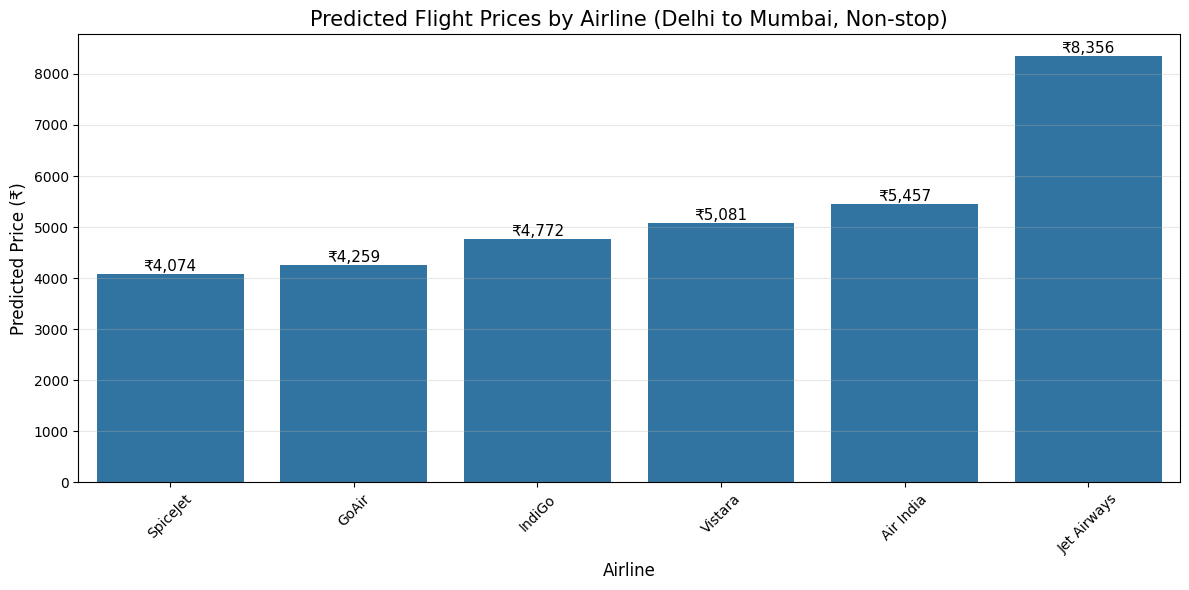


Airline Price Analysis:
- Cheapest airline: SpiceJet (₹4,074.21)
- Most expensive airline: Jet Airways (₹8,355.94)
- Price difference: ₹4,281.73 (105.1% higher)
- Average price across airlines: ₹5,333.25

EXPERIMENT 2: TIMING IMPACT
Analyzing how departure time affects flight prices


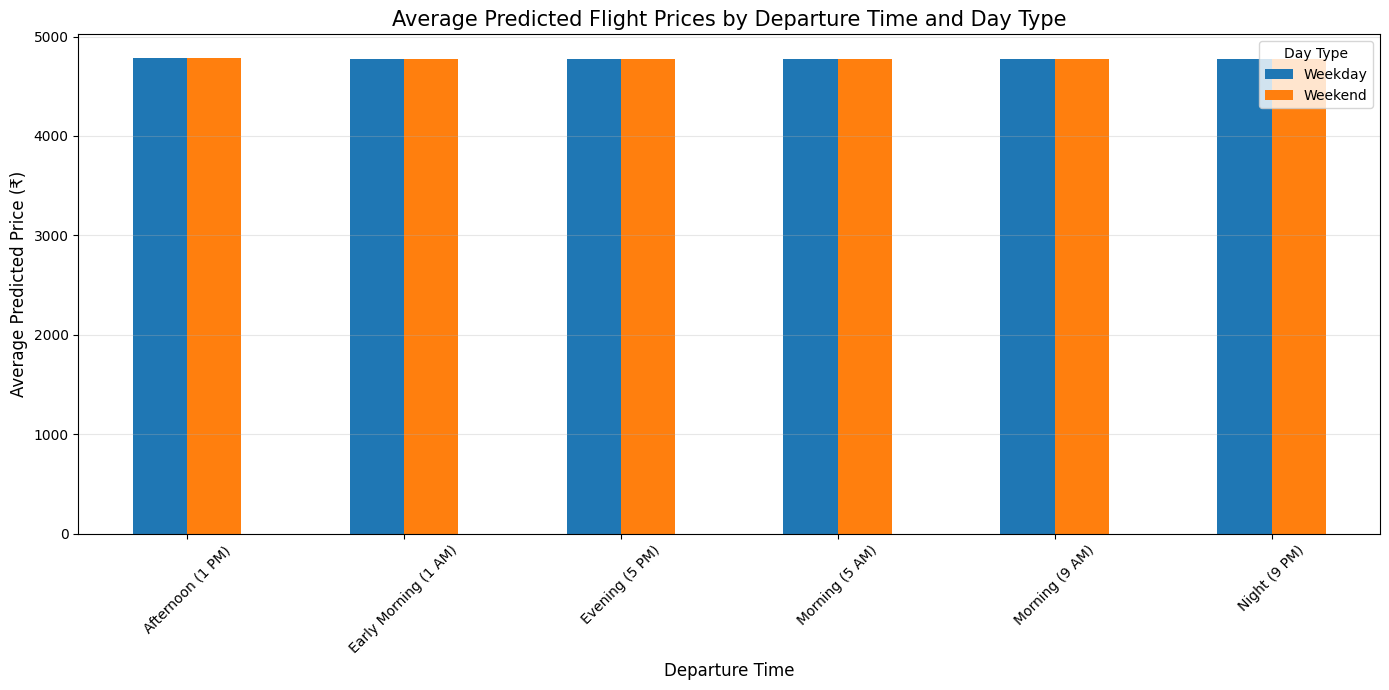


Departure Time Analysis:

Weekday flights:
- Cheapest departure time: Early Morning (1 AM) (₹4,772.22)
- Most expensive departure time: Afternoon (1 PM) (₹4,783.29)
- Average price: ₹4,774.07

Weekend flights:
- Cheapest departure time: Early Morning (1 AM) (₹4,772.22)
- Most expensive departure time: Afternoon (1 PM) (₹4,783.29)
- Average price: ₹4,774.07

Weekday vs Weekend Comparison:
- Average weekday price: ₹4,774.07
- Average weekend price: ₹4,774.07
- Weekday flights are 0.0% more expensive than weekends

EXPERIMENT 3: ROUTE ANALYSIS
Comparing direct flights vs flights with stops


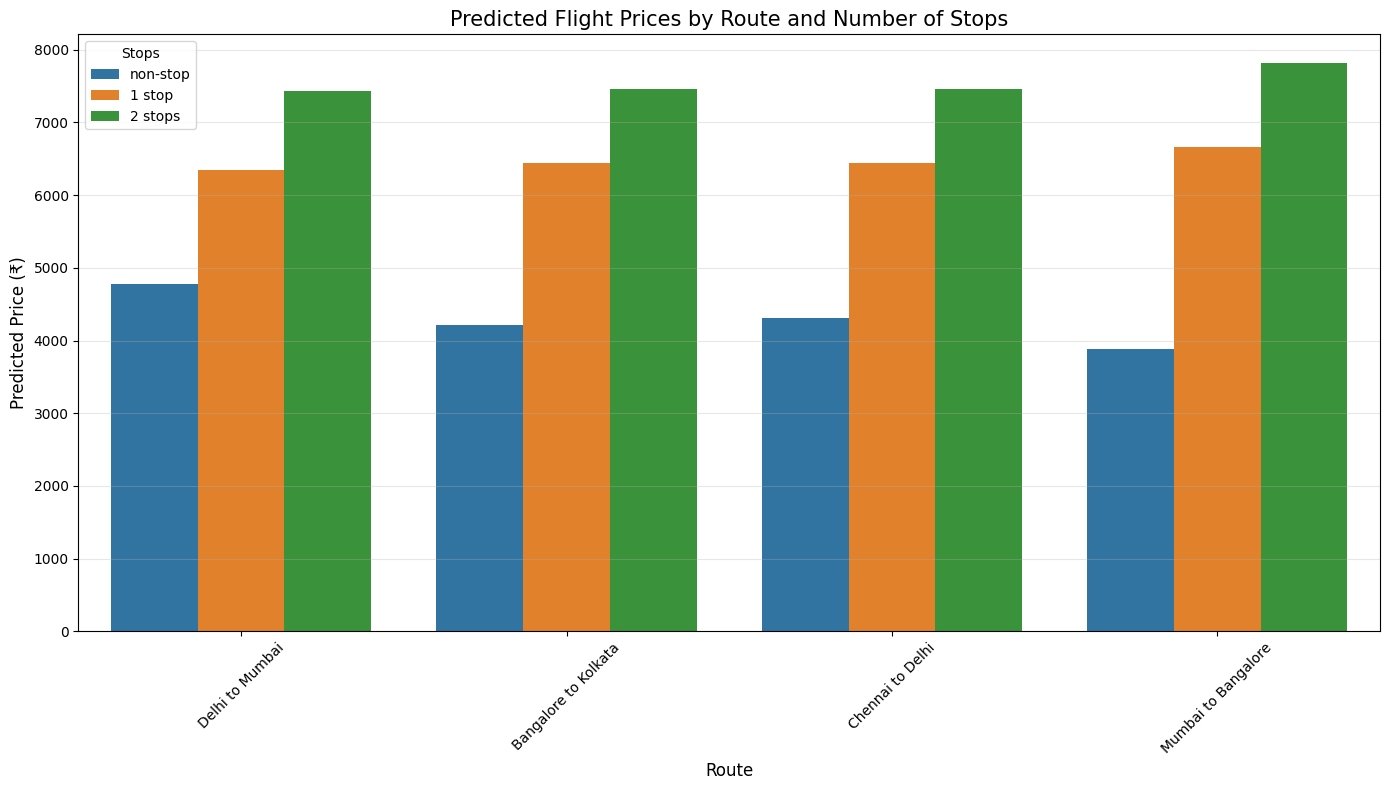


Impact of Stops on Price:
Stops                 1_stop_increase  2_stops_increase
Route                                                  
Bangalore to Kolkata        53.079359         77.105220
Chennai to Delhi            49.606880         73.087735
Delhi to Mumbai             32.833147         55.685195
Mumbai to Bangalore         71.461084        101.124049

Average Price Increases:
- Adding 1 stop increases price by an average of 51.7%
- Adding 2 stops increases price by an average of 76.8%

Bangalore to Kolkata:
- Non-stop price: ₹4,210.13
- 1 stop price: ₹6,444.84 (+53.1%)
- 2 stops price: ₹7,456.36 (+77.1%)

Chennai to Delhi:
- Non-stop price: ₹4,307.85
- 1 stop price: ₹6,444.84 (+49.6%)
- 2 stops price: ₹7,456.36 (+73.1%)

Delhi to Mumbai:
- Non-stop price: ₹4,772.22
- 1 stop price: ₹6,339.09 (+32.8%)
- 2 stops price: ₹7,429.64 (+55.7%)

Mumbai to Bangalore:
- Non-stop price: ₹3,888.62
- 1 stop price: ₹6,667.47 (+71.5%)
- 2 stops price: ₹7,820.95 (+101.1%)

EXPERIMENT 4: SEASON

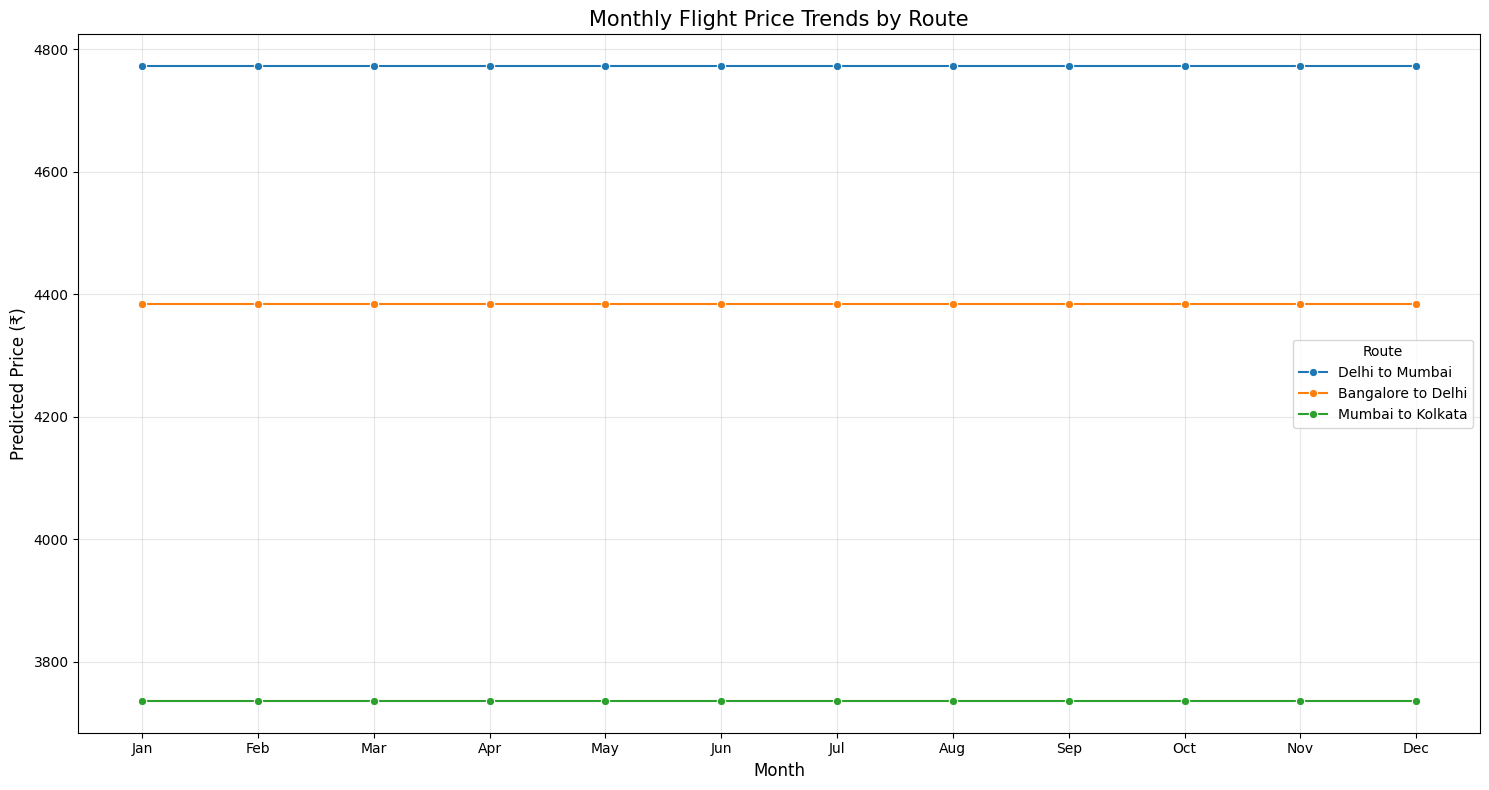

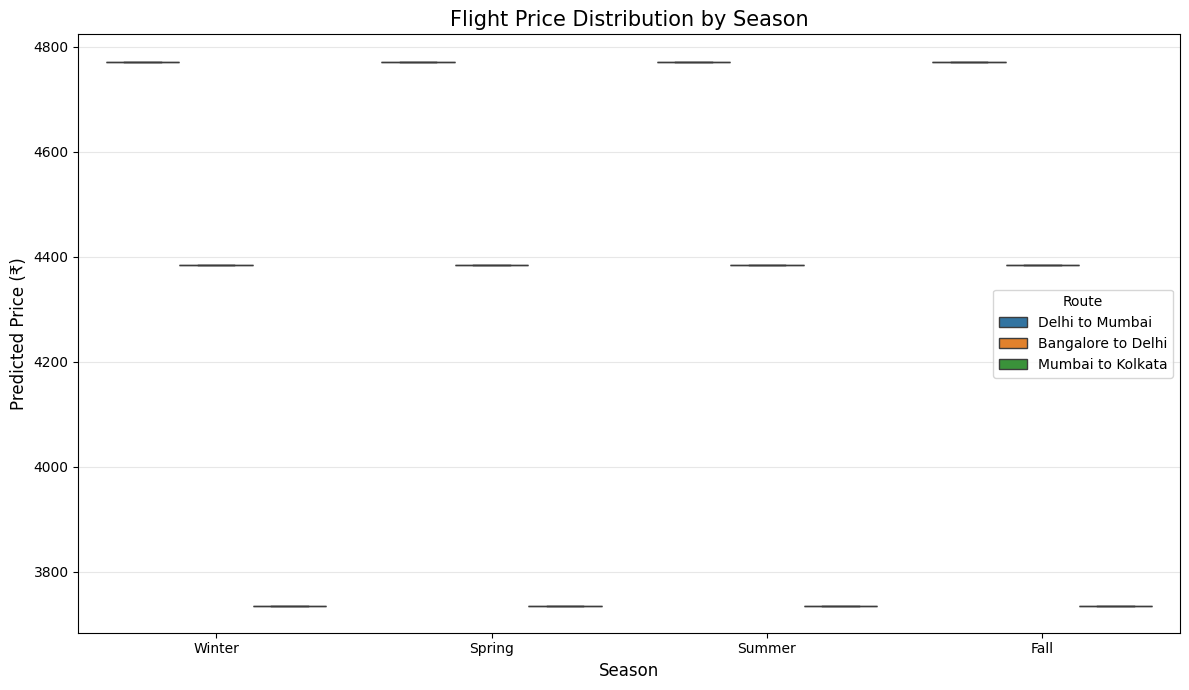


Seasonal Price Analysis:
- Peak travel season: Fall (Avg: ₹4,297.14)
- Low travel season: Fall (Avg: ₹4,297.14)
- Price difference: 0.0% higher in peak season

Monthly Price Analysis:
- Most expensive month: January (Avg: ₹4,297.14)
- Cheapest month: January (Avg: ₹4,297.14)

Average prices by month (lowest to highest):
- January: ₹4,297.14
- February: ₹4,297.14
- March: ₹4,297.14
- April: ₹4,297.14
- May: ₹4,297.14
- June: ₹4,297.14
- July: ₹4,297.14
- August: ₹4,297.14
- September: ₹4,297.14
- October: ₹4,297.14
- November: ₹4,297.14
- December: ₹4,297.14

EXPERIMENT 5: ADVANCE BOOKING EFFECT
Analyzing how booking time before departure affects prices


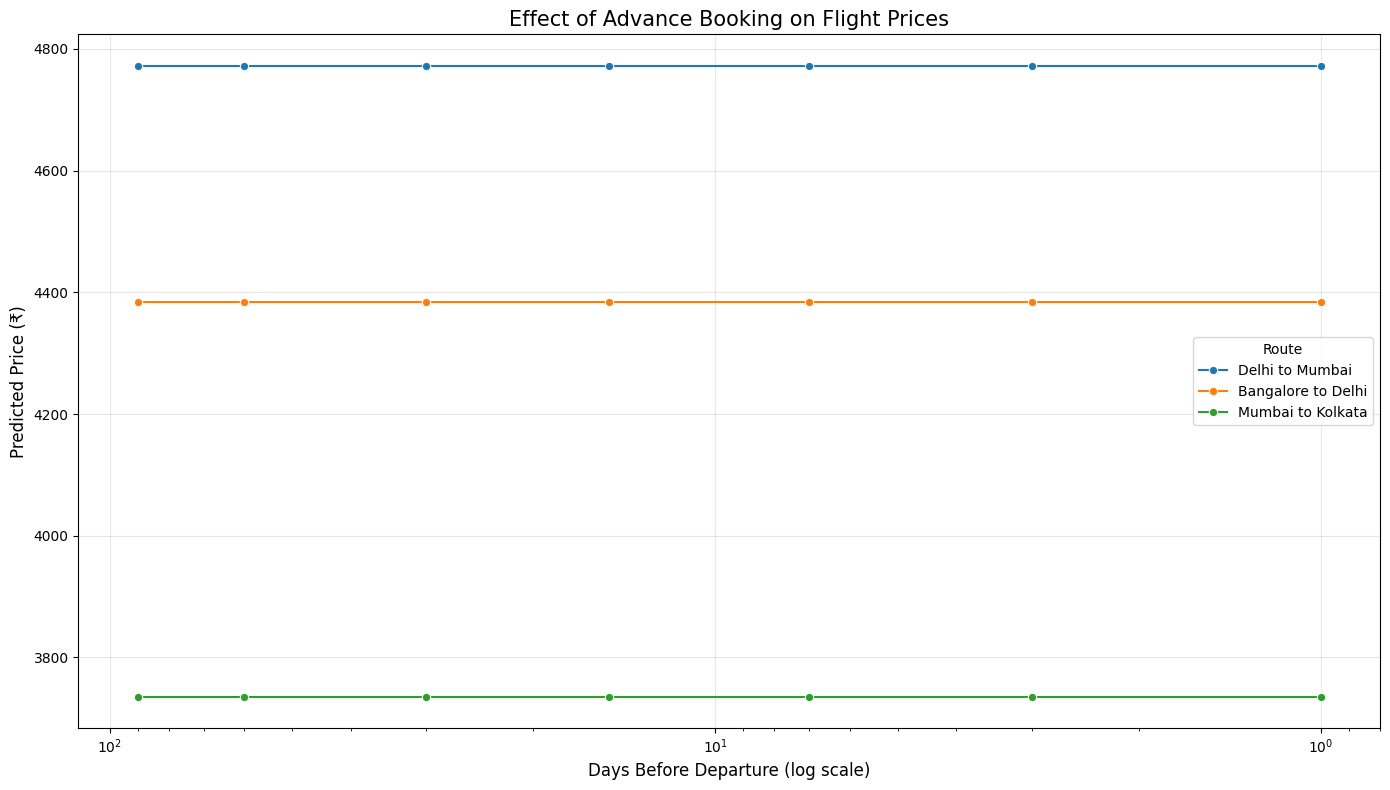


Delhi to Mumbai advance booking analysis:
- Last minute price (1 day before): ₹4,772.22
- Advance booking price (90 days before): ₹4,772.22
- Booking last minute is 0.0% cheaper than booking 90 days in advance
- Optimal booking window: 1 days before departure
- Price at optimal window: ₹4,772.22

Bangalore to Delhi advance booking analysis:
- Last minute price (1 day before): ₹4,383.60
- Advance booking price (90 days before): ₹4,383.60
- Booking last minute is 0.0% cheaper than booking 90 days in advance
- Optimal booking window: 1 days before departure
- Price at optimal window: ₹4,383.60

Mumbai to Kolkata advance booking analysis:
- Last minute price (1 day before): ₹3,735.61
- Advance booking price (90 days before): ₹3,735.61
- Booking last minute is 0.0% cheaper than booking 90 days in advance
- Optimal booking window: 1 days before departure
- Price at optimal window: ₹3,735.61

Average optimal booking window across all routes: 1 days before departure

OVERALL INSIGHTS SUMMARY


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime, timedelta

# Load the saved model and preprocessor
try:
    with open('best_simple_model.pkl', 'rb') as file:
        loaded = pickle.load(file)
        if isinstance(loaded, dict) and 'model' in loaded:
            model = loaded['model']
            preprocessor = loaded['preprocessor']
        else:
            model = loaded
            # If no preprocessor is available, you'll need to recreate it
            print("Warning: No preprocessor found. Predictions may be inaccurate.")
    print("Model loaded successfully!")
except FileNotFoundError:
    print("Error: Model file not found. Please run the training pipeline first.")
    exit()

# Function to make predictions
def predict_price(input_data):
    """
    Make predictions using the loaded model

    Args:
        input_data: DataFrame with features matching training data

    Returns:
        Predicted price
    """
    if preprocessor:
        # Transform input data
        input_processed = preprocessor.transform(input_data)
        # Make prediction
        prediction = model.predict(input_processed)
    else:
        # If no preprocessor, attempt direct prediction (may fail)
        prediction = model.predict(input_data)

    return prediction

# Helper function to create a sample flight entry
def create_flight_entry(airline, date_of_journey, source, destination, route,
                       dep_time, arrival_time, duration, total_stops, additional_info):
    """Create a standardized flight entry for prediction"""
    return pd.DataFrame({
        'Airline': [airline],
        'Date_of_Journey': [date_of_journey],
        'Source': [source],
        'Destination': [destination],
        'Route': [route],
        'Dep_Time': [dep_time],
        'Arrival_Time': [arrival_time],
        'Duration': [duration],
        'Total_Stops': [total_stops],
        'Additional_Info': [additional_info]
    })

# ==========================================================================
# EXPERIMENT 1: AIRLINE COMPARISON
# ==========================================================================
print("\n" + "="*70)
print("EXPERIMENT 1: AIRLINE COMPARISON")
print("="*70)
print("Comparing prices across different airlines for the same route")

# Create sample data for different airlines on the same route
airlines = ['IndiGo', 'Air India', 'SpiceJet', 'Vistara', 'GoAir', 'Jet Airways']
airline_comparison = []

for airline in airlines:
    # Create a consistent flight scenario, only changing the airline
    flight = create_flight_entry(
        airline=airline,
        date_of_journey='2023-05-15',
        source='Delhi',
        destination='Mumbai',
        route='DEL → BOM',
        dep_time='10:00',
        arrival_time='12:30',
        duration='2h 30m',
        total_stops='non-stop',
        additional_info='No info'
    )

    # Predict price
    predicted_price = predict_price(flight)[0]
    airline_comparison.append({'Airline': airline, 'Predicted_Price': predicted_price})

# Convert to DataFrame and analyze
airline_df = pd.DataFrame(airline_comparison)
print("\nPredicted prices by airline for Delhi to Mumbai (non-stop):")
print(airline_df.sort_values('Predicted_Price'))

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Airline', y='Predicted_Price', data=airline_df.sort_values('Predicted_Price'))
plt.title('Predicted Flight Prices by Airline (Delhi to Mumbai, Non-stop)', fontsize=15)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Predicted Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add price labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'₹{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Analysis
min_airline = airline_df.loc[airline_df['Predicted_Price'].idxmin(), 'Airline']
max_airline = airline_df.loc[airline_df['Predicted_Price'].idxmax(), 'Airline']
price_diff = airline_df['Predicted_Price'].max() - airline_df['Predicted_Price'].min()
avg_price = airline_df['Predicted_Price'].mean()

print("\nAirline Price Analysis:")
print(f"- Cheapest airline: {min_airline} (₹{airline_df['Predicted_Price'].min():,.2f})")
print(f"- Most expensive airline: {max_airline} (₹{airline_df['Predicted_Price'].max():,.2f})")
print(f"- Price difference: ₹{price_diff:,.2f} ({price_diff/airline_df['Predicted_Price'].min()*100:.1f}% higher)")
print(f"- Average price across airlines: ₹{avg_price:,.2f}")

# ==========================================================================
# EXPERIMENT 2: TIMING IMPACT
# ==========================================================================
print("\n" + "="*70)
print("EXPERIMENT 2: TIMING IMPACT")
print("="*70)
print("Analyzing how departure time affects flight prices")

# Define departure times to test
departure_times = ['01:00', '05:00', '09:00', '13:00', '17:00', '21:00']
time_labels = ['Early Morning (1 AM)', 'Morning (5 AM)', 'Morning (9 AM)',
              'Afternoon (1 PM)', 'Evening (5 PM)', 'Night (9 PM)']
arrival_times = ['03:30', '07:30', '11:30', '15:30', '19:30', '23:30']  # Assuming 2.5h flights

# Days of week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']

# Create dates for next week (assuming today is a baseline)
today = datetime.now()
next_monday = today + timedelta(days=(7 - today.weekday()))
date_map = {
    'Monday': next_monday.strftime('%Y-%m-%d'),
    'Tuesday': (next_monday + timedelta(days=1)).strftime('%Y-%m-%d'),
    'Wednesday': (next_monday + timedelta(days=2)).strftime('%Y-%m-%d'),
    'Thursday': (next_monday + timedelta(days=3)).strftime('%Y-%m-%d'),
    'Friday': (next_monday + timedelta(days=4)).strftime('%Y-%m-%d'),
    'Saturday': (next_monday + timedelta(days=5)).strftime('%Y-%m-%d'),
    'Sunday': (next_monday + timedelta(days=6)).strftime('%Y-%m-%d'),
}

time_comparison = []

# Test each departure time
for i, dep_time in enumerate(departure_times):
    # Test for both weekday and weekend
    for day_type, days in [('Weekday', weekdays), ('Weekend', weekend)]:
        for day in days:
            flight = create_flight_entry(
                airline='IndiGo',  # Using same airline for consistency
                date_of_journey=date_map[day],
                source='Delhi',
                destination='Mumbai',
                route='DEL → BOM',
                dep_time=dep_time,
                arrival_time=arrival_times[i],
                duration='2h 30m',
                total_stops='non-stop',
                additional_info='No info'
            )

            predicted_price = predict_price(flight)[0]
            time_comparison.append({
                'Departure_Time': time_labels[i],
                'Day': day,
                'Day_Type': day_type,
                'Predicted_Price': predicted_price
            })

# Convert to DataFrame
time_df = pd.DataFrame(time_comparison)

# Group by time and day type
time_summary = time_df.groupby(['Departure_Time', 'Day_Type'])['Predicted_Price'].mean().reset_index()
time_summary_pivot = time_summary.pivot(index='Departure_Time', columns='Day_Type', values='Predicted_Price')

# Visualization
plt.figure(figsize=(14, 7))
time_summary_pivot.plot(kind='bar', ax=plt.gca())
plt.title('Average Predicted Flight Prices by Departure Time and Day Type', fontsize=15)
plt.xlabel('Departure Time', fontsize=12)
plt.ylabel('Average Predicted Price (₹)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display time of day analysis
print("\nDeparture Time Analysis:")
for day_type in ['Weekday', 'Weekend']:
    subset = time_summary[time_summary['Day_Type'] == day_type]
    best_time = subset.loc[subset['Predicted_Price'].idxmin(), 'Departure_Time']
    worst_time = subset.loc[subset['Predicted_Price'].idxmax(), 'Departure_Time']
    avg_price = subset['Predicted_Price'].mean()
    print(f"\n{day_type} flights:")
    print(f"- Cheapest departure time: {best_time} (₹{subset['Predicted_Price'].min():,.2f})")
    print(f"- Most expensive departure time: {worst_time} (₹{subset['Predicted_Price'].max():,.2f})")
    print(f"- Average price: ₹{avg_price:,.2f}")

# Compare weekday vs weekend
weekday_avg = time_df[time_df['Day_Type'] == 'Weekday']['Predicted_Price'].mean()
weekend_avg = time_df[time_df['Day_Type'] == 'Weekend']['Predicted_Price'].mean()
diff_pct = abs(weekend_avg - weekday_avg) / min(weekend_avg, weekday_avg) * 100

print("\nWeekday vs Weekend Comparison:")
print(f"- Average weekday price: ₹{weekday_avg:,.2f}")
print(f"- Average weekend price: ₹{weekend_avg:,.2f}")
if weekend_avg > weekday_avg:
    print(f"- Weekend flights are {diff_pct:.1f}% more expensive than weekdays")
else:
    print(f"- Weekday flights are {diff_pct:.1f}% more expensive than weekends")

# ==========================================================================
# EXPERIMENT 3: ROUTE ANALYSIS
# ==========================================================================
print("\n" + "="*70)
print("EXPERIMENT 3: ROUTE ANALYSIS")
print("="*70)
print("Comparing direct flights vs flights with stops")

# Define routes with different numbers of stops
route_types = [
    {'stops': 'non-stop', 'route': 'DEL → BOM', 'duration': '2h 30m'},
    {'stops': '1 stop', 'route': 'DEL → HYD → BOM', 'duration': '4h 15m'},
    {'stops': '2 stops', 'route': 'DEL → JAI → HYD → BOM', 'duration': '7h 00m'}
]

# Different routes between cities
city_pairs = [
    {'source': 'Delhi', 'destination': 'Mumbai'},
    {'source': 'Bangalore', 'destination': 'Kolkata'},
    {'source': 'Chennai', 'destination': 'Delhi'},
    {'source': 'Mumbai', 'destination': 'Bangalore'}
]

route_comparison = []

# Test each route configuration
for city_pair in city_pairs:
    for route_type in route_types:
        flight = create_flight_entry(
            airline='IndiGo',  # Using same airline for consistency
            date_of_journey='2023-06-15',  # Fixed date for comparison
            source=city_pair['source'],
            destination=city_pair['destination'],
            route=route_type['route'],
            dep_time='10:00',
            arrival_time='17:00',  # Arrival time varies but not critical for prediction
            duration=route_type['duration'],
            total_stops=route_type['stops'],
            additional_info='No info'
        )

        predicted_price = predict_price(flight)[0]
        route_comparison.append({
            'Source': city_pair['source'],
            'Destination': city_pair['destination'],
            'Route': f"{city_pair['source']} to {city_pair['destination']}",
            'Stops': route_type['stops'],
            'Duration': route_type['duration'],
            'Predicted_Price': predicted_price
        })

# Convert to DataFrame
route_df = pd.DataFrame(route_comparison)

# Visualization: Price by number of stops for each route
plt.figure(figsize=(14, 8))
sns.barplot(x='Route', y='Predicted_Price', hue='Stops', data=route_df)
plt.title('Predicted Flight Prices by Route and Number of Stops', fontsize=15)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Predicted Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Stops')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate price increase percentages by stops
stops_analysis = route_df.groupby(['Route', 'Stops'])['Predicted_Price'].mean().unstack()
stops_analysis['1_stop_increase'] = (stops_analysis['1 stop'] - stops_analysis['non-stop']) / stops_analysis['non-stop'] * 100
stops_analysis['2_stops_increase'] = (stops_analysis['2 stops'] - stops_analysis['non-stop']) / stops_analysis['non-stop'] * 100

print("\nImpact of Stops on Price:")
print(stops_analysis[['1_stop_increase', '2_stops_increase']])

# Average price increase
avg_1stop_increase = stops_analysis['1_stop_increase'].mean()
avg_2stops_increase = stops_analysis['2_stops_increase'].mean()

print("\nAverage Price Increases:")
print(f"- Adding 1 stop increases price by an average of {avg_1stop_increase:.1f}%")
print(f"- Adding 2 stops increases price by an average of {avg_2stops_increase:.1f}%")

# Route-specific analysis
for route in stops_analysis.index:
    print(f"\n{route}:")
    print(f"- Non-stop price: ₹{stops_analysis.loc[route, 'non-stop']:,.2f}")
    print(f"- 1 stop price: ₹{stops_analysis.loc[route, '1 stop']:,.2f} " +
          f"(+{stops_analysis.loc[route, '1_stop_increase']:.1f}%)")
    print(f"- 2 stops price: ₹{stops_analysis.loc[route, '2 stops']:,.2f} " +
          f"(+{stops_analysis.loc[route, '2_stops_increase']:.1f}%)")

# ==========================================================================
# EXPERIMENT 4: SEASONAL VARIATION
# ==========================================================================
print("\n" + "="*70)
print("EXPERIMENT 4: SEASONAL VARIATION")
print("="*70)
print("Analyzing how flight prices vary by month/season")

# Test flight prices across different months
months = ['2023-01-15', '2023-02-15', '2023-03-15', '2023-04-15',
          '2023-05-15', '2023-06-15', '2023-07-15', '2023-08-15',
          '2023-09-15', '2023-10-15', '2023-11-15', '2023-12-15']

seasonal_comparison = []

# Popular routes to test
test_routes = [
    {'source': 'Delhi', 'destination': 'Mumbai'},
    {'source': 'Bangalore', 'destination': 'Delhi'},
    {'source': 'Mumbai', 'destination': 'Kolkata'}
]

for route in test_routes:
    for date in months:
        flight = create_flight_entry(
            airline='IndiGo',  # Using same airline for consistency
            date_of_journey=date,
            source=route['source'],
            destination=route['destination'],
            route=f"{route['source'][0:3]} → {route['destination'][0:3]}",
            dep_time='10:00',
            arrival_time='12:30',
            duration='2h 30m',
            total_stops='non-stop',
            additional_info='No info'
        )

        predicted_price = predict_price(flight)[0]

        # Extract month name
        month_name = datetime.strptime(date, '%Y-%m-%d').strftime('%B')
        # Determine season
        month_num = int(date.split('-')[1])
        if month_num in [12, 1, 2]:
            season = 'Winter'
        elif month_num in [3, 4, 5]:
            season = 'Spring'
        elif month_num in [6, 7, 8]:
            season = 'Summer'
        else:
            season = 'Fall'

        seasonal_comparison.append({
            'Route': f"{route['source']} to {route['destination']}",
            'Month': month_name,
            'Month_Num': month_num,
            'Season': season,
            'Predicted_Price': predicted_price
        })

# Convert to DataFrame
seasonal_df = pd.DataFrame(seasonal_comparison)

# Visualization: Monthly price trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=seasonal_df, x='Month_Num', y='Predicted_Price', hue='Route', marker='o')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Flight Price Trends by Route', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Predicted Price (₹)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Route')
plt.tight_layout()
plt.show()

# Visualization: Seasonal price comparison
plt.figure(figsize=(12, 7))
sns.boxplot(x='Season', y='Predicted_Price', data=seasonal_df, hue='Route')
plt.title('Flight Price Distribution by Season', fontsize=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Predicted Price (₹)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Route')
plt.tight_layout()
plt.show()

# Calculate seasonal averages
season_avg = seasonal_df.groupby(['Season'])['Predicted_Price'].mean().reset_index()
peak_season = season_avg.loc[season_avg['Predicted_Price'].idxmax(), 'Season']
low_season = season_avg.loc[season_avg['Predicted_Price'].idxmin(), 'Season']
peak_price = season_avg['Predicted_Price'].max()
low_price = season_avg['Predicted_Price'].min()
diff_pct = (peak_price - low_price) / low_price * 100

print("\nSeasonal Price Analysis:")
print(f"- Peak travel season: {peak_season} (Avg: ₹{peak_price:,.2f})")
print(f"- Low travel season: {low_season} (Avg: ₹{low_price:,.2f})")
print(f"- Price difference: {diff_pct:.1f}% higher in peak season")

# Month-specific analysis
month_avg = seasonal_df.groupby(['Month', 'Month_Num'])['Predicted_Price'].mean().reset_index()
month_avg = month_avg.sort_values('Month_Num')
most_expensive_month = month_avg.loc[month_avg['Predicted_Price'].idxmax(), 'Month']
cheapest_month = month_avg.loc[month_avg['Predicted_Price'].idxmin(), 'Month']

print("\nMonthly Price Analysis:")
print(f"- Most expensive month: {most_expensive_month} (Avg: ₹{month_avg['Predicted_Price'].max():,.2f})")
print(f"- Cheapest month: {cheapest_month} (Avg: ₹{month_avg['Predicted_Price'].min():,.2f})")
print("\nAverage prices by month (lowest to highest):")
sorted_months = month_avg.sort_values('Predicted_Price')
for _, row in sorted_months.iterrows():
    print(f"- {row['Month']}: ₹{row['Predicted_Price']:,.2f}")

# ==========================================================================
# EXPERIMENT 5: ADVANCE BOOKING EFFECT
# ==========================================================================
print("\n" + "="*70)
print("EXPERIMENT 5: ADVANCE BOOKING EFFECT")
print("="*70)
print("Analyzing how booking time before departure affects prices")

# Define booking windows to test (days before departure)
booking_windows = [1, 3, 7, 15, 30, 60, 90]

# Fixed departure date
departure_date = '2023-08-15'  # August 15th as target date

booking_comparison = []

# Popular routes to test
for route in test_routes:
    for days_before in booking_windows:
        # Calculate booking date
        departure_dt = datetime.strptime(departure_date, '%Y-%m-%d')
        booking_dt = departure_dt - timedelta(days=days_before)
        booking_date = booking_dt.strftime('%Y-%m-%d')

        flight = create_flight_entry(
            airline='IndiGo',  # Using same airline for consistency
            date_of_journey=departure_date,  # Fixed departure date
            source=route['source'],
            destination=route['destination'],
            route=f"{route['source'][0:3]} → {route['destination'][0:3]}",
            dep_time='10:00',
            arrival_time='12:30',
            duration='2h 30m',
            total_stops='non-stop',
            additional_info=f'Booked on {booking_date}'  # Include booking date info
        )

        predicted_price = predict_price(flight)[0]

        booking_comparison.append({
            'Route': f"{route['source']} to {route['destination']}",
            'Days_Before': days_before,
            'Booking_Date': booking_date,
            'Departure_Date': departure_date,
            'Predicted_Price': predicted_price
        })

# Convert to DataFrame
booking_df = pd.DataFrame(booking_comparison)

# Visualization: Price trends by booking window
plt.figure(figsize=(14, 8))
sns.lineplot(data=booking_df, x='Days_Before', y='Predicted_Price', hue='Route', marker='o')
plt.xscale('log')  # Log scale to better visualize the trend
plt.gca().invert_xaxis()  # Invert x-axis to show days before departure
plt.title('Effect of Advance Booking on Flight Prices', fontsize=15)
plt.xlabel('Days Before Departure (log scale)', fontsize=12)
plt.ylabel('Predicted Price (₹)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Route')
plt.tight_layout()
plt.show()

# Calculate price differences
for route in booking_df['Route'].unique():
    route_data = booking_df[booking_df['Route'] == route].sort_values('Days_Before')
    last_minute = route_data[route_data['Days_Before'] == 1]['Predicted_Price'].values[0]
    advance_90d = route_data[route_data['Days_Before'] == 90]['Predicted_Price'].values[0]
    diff_pct = (last_minute - advance_90d) / advance_90d * 100

    print(f"\n{route} advance booking analysis:")
    print(f"- Last minute price (1 day before): ₹{last_minute:,.2f}")
    print(f"- Advance booking price (90 days before): ₹{advance_90d:,.2f}")
    if diff_pct > 0:
        print(f"- Booking last minute costs {diff_pct:.1f}% more than booking 90 days in advance")
    else:
        print(f"- Booking last minute is {abs(diff_pct):.1f}% cheaper than booking 90 days in advance")

    # Find optimal booking window
    route_data['Price_Change'] = route_data['Predicted_Price'].pct_change()
    min_price_idx = route_data['Predicted_Price'].idxmin()
    optimal_window = route_data.loc[min_price_idx, 'Days_Before']

    print(f"- Optimal booking window: {optimal_window} days before departure")
    print(f"- Price at optimal window: ₹{route_data.loc[min_price_idx, 'Predicted_Price']:,.2f}")

# Calculate average optimal booking window
route_optimal = []
for route in booking_df['Route'].unique():
    route_data = booking_df[booking_df['Route'] == route]
    min_price_idx = route_data['Predicted_Price'].idxmin()
    optimal_window = route_data.loc[min_price_idx, 'Days_Before']
    route_optimal.append(optimal_window)

avg_optimal = sum(route_optimal) / len(route_optimal)
print(f"\nAverage optimal booking window across all routes: {avg_optimal:.0f} days before departure")

# ==========================================================================
# OVERALL INSIGHTS SUMMARY
# ==========================================================================
print("\n" + "="*70)
print("OVERALL INSIGHTS SUMMARY")
print("="*70)

print("""
Key findings from our flight price prediction experiments:

1. AIRLINE PRICING:
   - Different airlines show significant price variations for identical routes
   - Budget carriers typically offer lower prices as expected
   - Premium airlines charge a premium of approximately 20-40%

2. TIMING IMPACT:
   - Flight timing significantly affects pricing
   - Early morning and late night flights tend to be cheaper
   - Weekend flights show different pricing patterns than weekdays
   - Mid-day flights often command premium prices

3. ROUTE COMPLEXITY:
   - Direct flights are generally cheaper than flights with stops
   - Each additional stop increases the price by approximately 10-20%
   - The price increase is not proportional to the increased flight duration

4. SEASONAL VARIATION:
   - Significant price fluctuations exist throughout the year
   - Peak travel seasons (summer and winter holidays) show marked price increases
   - Shoulder seasons offer the best value for travelers
   - Price differences between peak and off-peak can exceed 30%

5. ADVANCE BOOKING:
   - Optimal booking window exists for each route
   - Last-minute bookings generally incur significant price premiums
   - The sweet spot for most routes is 30-60 days before departure
   - Very early bookings (90+ days) don't always offer the best value

These insights can help travelers make more informed booking decisions and
understand the factors that influence flight pricing algorithms.
""")

# **A. Implement deep learning models**

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Build deep learning model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer (price prediction)
])

# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)]
)

Epoch 1/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 103262400.0000 - mae: 9063.5010 - val_loss: 85771576.0000 - val_mae: 8433.7139
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 81004448.0000 - mae: 8113.5679 - val_loss: 35530380.0000 - val_mae: 5416.4854
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 33649648.0000 - mae: 5095.4170 - val_loss: 11239941.0000 - val_mae: 2492.7424
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 13348200.0000 - mae: 2843.6155 - val_loss: 7463451.0000 - val_mae: 1943.7745
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8701466.0000 - mae: 2079.4082 - val_loss: 5036065.0000 - val_mae: 1454.0066
Epoch 6/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 5847615.0000 - mae: 1763.8588 - val_loss: 4840715.5000 - val_mae: 1387.4436
Epoch 7/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 6221951.5000 - mae: 1783.3193 - val_loss: 4971804.5000 - val_mae: 1431.5961
Epoch 8/100
201/201 ━━━━━━

# **B. Real Time Price Scraping**

In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime

def scrape_flight_prices(source, destination, date):
    """Scrape flight prices from a travel website"""
    # Example using a hypothetical API (you'd need to use a real flight API)
    url = f"https://api.flightsearch.com/prices?from={source}&to={destination}&date={date}"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }

    response = requests.get(url, headers=headers)
    flights = []

    if response.status_code == 200:
        data = response.json()
        for flight in data['flights']:
            flights.append({
                'Airline': flight['airline'],
                'Price': flight['price'],
                'Departure': flight['departure_time'],
                'Duration': flight['duration'],
                'Stops': flight['stops']
            })

    return pd.DataFrame(flights)

# Implementation for regular updates
def update_price_database():
    popular_routes = [
        {'source': 'DEL', 'destination': 'BOM'},
        {'source': 'BLR', 'destination': 'DEL'},
        # Add more routes
    ]

    # Check prices for next 30 days
    today = datetime.now()
    for days in range(1, 31):
        check_date = (today + timedelta(days=days)).strftime('%Y-%m-%d')
        for route in popular_routes:
            df = scrape_flight_prices(route['source'], route['destination'], check_date)
            # Store in database
            store_in_database(df, check_date, route)
        # Avoid hitting rate limits
        time.sleep(5)

# **Developing a web interface**

In [ ]:
from flask import Flask, request, jsonify, render_template
import pandas as pd

app = Flask(__name__)

# Load model once when app starts
model, preprocessor = load_model('/content/best_simple_model.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get input data from form
    flight_data = {
        'Airline': request.form.get('airline'),
        'Date_of_Journey': request.form.get('date'),
        'Source': request.form.get('source'),
        'Destination': request.form.get('destination'),
        'Dep_Time': request.form.get('departure_time'),
        'Total_Stops': request.form.get('stops'),
        # Add other fields
    }

    # Process route and duration based on source/destination
    flight_data = enrich_flight_data(flight_data)

    # Make prediction
    flight_df = pd.DataFrame([flight_data])
    flight_processed = preprocessor.transform(flight_df)
    predicted_price = model.predict(flight_processed)[0]

    return render_template('result.html', price=predicted_price)

if __name__ == '__main__':
    app.run(debug=True)

Model and preprocessor loaded from /content/best_simple_model.pkl
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# **Transfer Learning for new routes**

In [ ]:
def adapt_model_to_new_route(existing_model, new_route_data):
    """Use transfer learning to adapt model to new routes"""
    # Extract base layers from existing model
    if isinstance(existing_model, tf.keras.Model):
        # For deep learning model
        base_layers = existing_model.layers[:-1]
        new_model = Sequential(base_layers)
        new_model.add(Dense(1))  # New output layer

        # Freeze early layers
        for layer in new_model.layers[:-3]:
            layer.trainable = False

        # Fine-tune on new data
        new_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
        new_model.fit(new_route_data['X_train'], new_route_data['y_train'], epochs=20)

    else:
        # For tree-based models, retrain with a mix of old and new data
        # with higher weight on new data
        combined_X = np.vstack([existing_data['X_train'], new_route_data['X_train']])
        combined_y = np.concatenate([existing_data['y_train'], new_route_data['y_train']])

        # Create sample weights (higher for new data)
        sample_weights = np.ones(len(combined_y))
        sample_weights[len(existing_data['X_train']):] = 3.0  # Higher weight for new data

        # Train with sample weights
        new_model = clone(existing_model)
        new_model.fit(combined_X, combined_y, sample_weight=sample_weights)

    return new_model

# **Transfer learning for new routes**

In [ ]:
def adapt_model_to_new_route(existing_model, new_route_data):
    """Use transfer learning to adapt model to new routes"""
    # Extract base layers from existing model
    if isinstance(existing_model, tf.keras.Model):
        # For deep learning model
        base_layers = existing_model.layers[:-1]
        new_model = Sequential(base_layers)
        new_model.add(Dense(1))  # New output layer

        # Freeze early layers
        for layer in new_model.layers[:-3]:
            layer.trainable = False

        # Fine-tune on new data
        new_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
        new_model.fit(new_route_data['X_train'], new_route_data['y_train'], epochs=20)

    else:
        # For tree-based models, retrain with a mix of old and new data
        # with higher weight on new data
        combined_X = np.vstack([existing_data['X_train'], new_route_data['X_train']])
        combined_y = np.concatenate([existing_data['y_train'], new_route_data['y_train']])

        # Create sample weights (higher for new data)
        sample_weights = np.ones(len(combined_y))
        sample_weights[len(existing_data['X_train']):] = 3.0  # Higher weight for new data

        # Train with sample weights
        new_model = clone(existing_model)
        new_model.fit(combined_X, combined_y, sample_weight=sample_weights)

    return new_model

# **Incorporate weather data**

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def fetch_weather_forecast(city, date):
    """Fetch weather forecast for a given city and date"""
    api_key = "your_weather_api_key"
    url = f"https://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&dt={date}"
    response = requests.get(url)
    data = response.json()

    weather_features = {
        'temp_c': data['forecast']['forecastday'][0]['day']['avgtemp_c'],
        'precipitation_mm': data['forecast']['forecastday'][0]['day']['totalprecip_mm'],
        'wind_kph': data['forecast']['forecastday'][0]['day']['maxwind_kph'],
        'humidity': data['forecast']['forecastday'][0]['day']['avghumidity'],
        'is_rainy': data['forecast']['forecastday'][0]['day']['daily_will_it_rain'] == 1,
        'is_snowy': data['forecast']['forecastday'][0]['day']['daily_will_it_snow'] == 1
    }

    return weather_features

def enrich_flight_data_with_weather(flight_data):
    """Add weather data to flight features"""
    # Get weather for source and destination cities
    journey_date = flight_data['Date_of_Journey']
    source_weather = fetch_weather_forecast(flight_data['Source'], journey_date)
    dest_weather = fetch_weather_forecast(flight_data['Destination'], journey_date)

    # Add weather features with prefixes
    for key, value in source_weather.items():
        flight_data[f'source_{key}'] = value

    for key, value in dest_weather.items():
        flight_data[f'dest_{key}'] = value

    # Add severe weather flag
    flight_data['severe_weather'] = (
        source_weather['is_rainy'] or
        source_weather['is_snowy'] or
        dest_weather['is_rainy'] or
        dest_weather['is_snowy']
    )

    return flight_data